### 1 Sample


In [599]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [600]:
df = pd.read_csv('./Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [601]:
X = df.Level # Sử dụng cột level làm dữ liệu đầu vào 
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [602]:
y = df.Salary # sử dụng làm dữu liệu dự đoán 
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Text(0, 0.5, 'Salary')

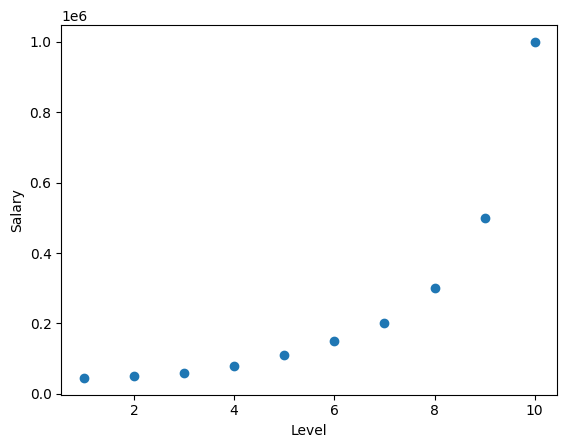

In [603]:
plt.scatter(X,y)
plt.xlabel("Level")
plt.ylabel("Salary")

In [604]:
def r2_score(y_hat,y):
    rss = np.sum((y_hat -y)**2)
    tss = np.sum((y-y.mean())**2)
    
    r2 = 1 -(rss/tss)
    return r2

In [605]:
class LinearRegression:
    def __init__(self,x_data,y_data,lr = 0.01,epochs = 10000):
        self.x_data = x_data
        self.y_data = y_data
        self.lr = lr
        self.epochs = epochs
        self.num_samples = self.x_data.shape[0]
        
        self.theta = np.random.rand(self.x_data.shape[1])
        self.losses = []
    
    def compute_loss(self,y_hat,y_data):
        loss = (y_hat-y_data)*(y_hat-y_data)
        loss = np.mean(loss)
        return loss
    
    def predict(self,x_data):
        y_hat = x_data.dot(self.theta)
        return y_hat
    
    def fit(self):
        for i in range(self.epochs):
            
            y_hat = self.predict(self.x_data)
            
            loss = self.compute_loss(y_hat,self.y_data)
            self.losses.append(loss)
            
            k = 2*(y_hat-self.y_data)
            gradient = self.x_data.T.dot(k) / self.num_samples
            
            self.theta = self.theta - self.lr*gradient
            
        return{
            'loss': sum(self.losses)/len(self.losses),
            'weight' : self.theta
        }        

In [606]:
print(type(X))
print(type(X.values))
print(X.values.shape)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(10,)


In [607]:
X_linear = X.values.reshape(-1, 1)
print(X_linear.shape)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))

(10, 1)


In [608]:
X_linear
# cột 0 : bias
# cột 1 : input

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [609]:
linear_model = LinearRegression(X_linear, y, epochs=100)
linear_model.fit()

{'loss': 33803442867.49854,
 'weight': array([-62217.44741227,  61757.94869834])}

In [610]:
y_pred = linear_model.predict(X_linear)
print(r2_score(y_pred, y))

0.6219618736533


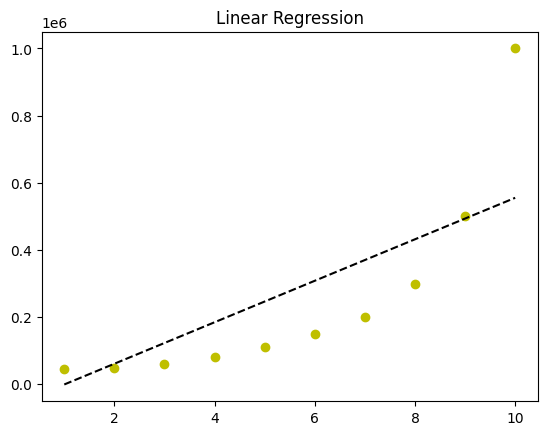

In [611]:
plt.title('Linear Regression')
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

#### Polymial Regression

In [612]:
def create_polynomial_features(X,degree = 2): #khởi tạo hàm bậc 2
    X_new = X
    for i in range(2,degree+1):
        X_new = np.c_[X_new,np.power(X,i)]
    return X_new

In [613]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]], dtype=int64)

In [614]:
x_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [615]:
poly_model = LinearRegression(x_poly, y, lr=0.0001,epochs=10000)
poly_model.fit()

{'loss': 11093673749.491917,
 'weight': array([ 14602.50961407, -47838.76389674,  12584.3927411 ])}

In [616]:
y_pred = poly_model.predict(x_poly)
r2_score(y_pred, y)

0.8736086726561816

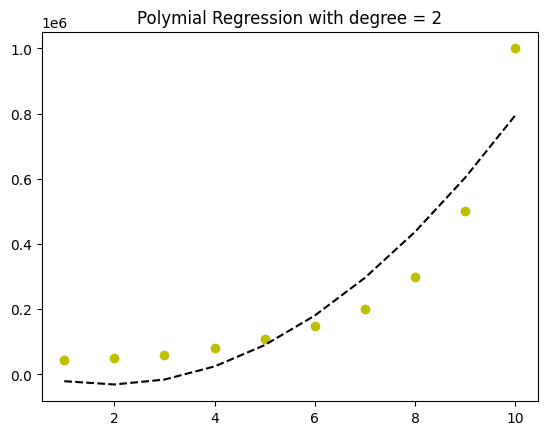

In [617]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.title('Polymial Regression with degree = 2')
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

In [618]:
def create_polynomial_features(X,degree = 3): #khởi tạo hàm bậc 2
    X_new = X
    for i in range(2,degree+1):
        X_new = np.c_[X_new,np.power(X,i)]
    return X_new

In [619]:
X_poly = create_polynomial_features(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]], dtype=int64)

In [620]:
x_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [621]:
model_degree3 = LinearRegression(x_poly,y,lr = 0.000001,epochs=500)
model_degree3.fit()

{'loss': 7332252306.245405,
 'weight': array([   1.25318779,  -47.75929341, -233.38270464,  855.44716807])}

In [622]:
y_pred = model_degree3.predict(x_poly)
r2_score(y_pred, y)

0.9156827280591509

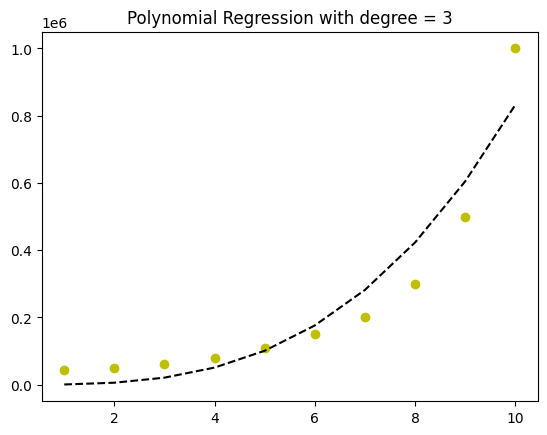

In [627]:
X_plot = df.Level
y_func = model_degree3.theta[3]*X*X*X + model_degree3.theta[2]*X*X + model_degree3.theta[1]*X + model_degree3.theta[0]
plt.title('Polynomial Regression with degree = 3')
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

In [637]:
# Sklearn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)

In [638]:
X.to_frame()
print(type(X))

<class 'pandas.core.series.Series'>


In [639]:
X_poly = poly_features.fit_transform(X.to_frame())
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [641]:
poly_model = LinearRegression(X_poly, y, lr=0.000001, epochs=500)
poly_model.fit()

{'loss': 7333285725.848447,
 'weight': array([   1.19147036,  -47.69665158, -232.58428733,  855.35731076])}

In [643]:
y_pred = poly_model.predict(X_poly)
r2_score(y_pred, y)

0.9156763603728039

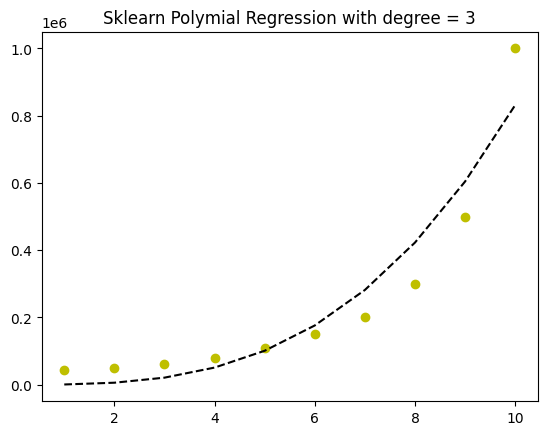

In [644]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.title('Sklearn Polymial Regression with degree = 3')
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()